In [1]:
import tensorflow as tf

/Users/yoshidayuusei/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:

#パラメータは変数として定義
X = tf.Variable(0. , name='X')

#パラメータを使って最小化したい関数を定義する
func = (X - 1)**2

#最小勾配法のメソッド
#learning_rate：一度にずらす大きさを決める
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

#train_stepがXを少しずらす操作を行う
train_step = optimizer.minimize(func)

#train_stepを繰り返し実行する
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        sess.run(train_step)
    print('X = ', sess.run(X))


X =  0.99998575


In [3]:
import matplotlib.pyplot as plt
import numpy  as np

x = np.arange(-10, 10, 0.01)
plt.plot(x, (x-1)**2)
#plt.scatter(dot, (dot-1)**2)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

Using TensorFlow backend.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
import scipy  
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import missingno as msno
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import StandardScaler

num = pd.get_option("display.max_columns")
pd.set_option('display.max_columns', num)

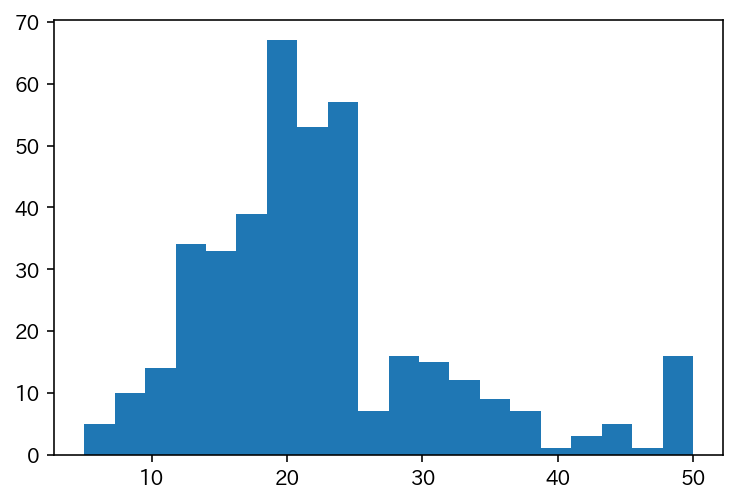

In [6]:
plt.hist(y_train, bins=20)
plt.show()

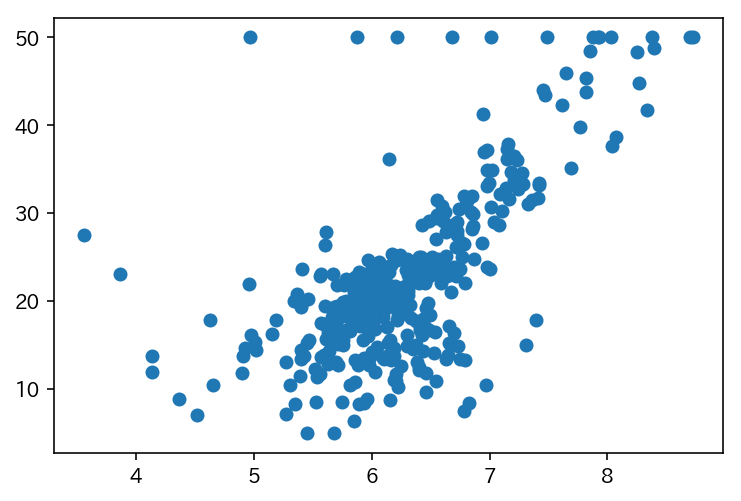

In [7]:
plt.plot(X_train[:,5], y_train, 'o')

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [9]:
sa = StandardScaler()
y_train.reshape((-1, 1))
sa.fit_transform(y_train[1])

array([[0.]])

In [10]:
#学習モデルの定義

#説明変数用のプレイスホルダー
x = tf.placeholder(tf.float32, (None, 13), name="x")
#目的変数用のプレイスホルダー
y = tf.placeholder(tf.float32, (None, 1), name="y")

#説明変数を重みｗで足し合わせただけの簡単なのでモデル
#正規分布からランダムな値を出力
#重みの初期値はランダムに生成
w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w) #x*w

In [11]:
#最小二乗法を使用
loss = tf.reduce_mean((y - pred)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.15)
train_step = optimizer.minimize(loss)

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict = {
                x:X_train,
                y:y_train.reshape((-1, 1))
            }
        )
        print('step : {}, train_loss : {}'.format(step, train_loss))
        
        #学習が終わったら評価してみる
    pred = sess.run(pred, feed_dict = {x: X_test})

step : 0, train_loss : 604.16162109375
step : 1, train_loss : 572.5626831054688
step : 2, train_loss : 555.4710693359375
step : 3, train_loss : 545.5039672851562
step : 4, train_loss : 539.2857055664062
step : 5, train_loss : 535.1875610351562
step : 6, train_loss : 532.3707275390625
step : 7, train_loss : 530.3726196289062
step : 8, train_loss : 528.9207763671875
step : 9, train_loss : 527.8450927734375
step : 10, train_loss : 527.034912109375
step : 11, train_loss : 526.415283203125
step : 12, train_loss : 525.9346923828125
step : 13, train_loss : 525.5568237304688
step : 14, train_loss : 525.2557373046875
step : 15, train_loss : 525.0126953125
step : 16, train_loss : 524.8140258789062
step : 17, train_loss : 524.6497192382812
step : 18, train_loss : 524.5123291015625
step : 19, train_loss : 524.396240234375
step : 20, train_loss : 524.29736328125
step : 21, train_loss : 524.2122802734375
step : 22, train_loss : 524.1387939453125
step : 23, train_loss : 524.0745849609375
step : 24, t